<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
FALL 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Neural Networks <br>
<font color=696880 size=4>
Arash Ziyaei Razban

____________

# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: `here`

Student ID: `here`

# Recurrent Neural Network (RNN)

Nowadays machine learning algorithms and models are used to solve too many types of problems. One of the most important problems is sequence modeling. Sequence modeling is the ability of an algorithm to model, interpret, make predictions about, or generate sequence data like audio, text, etc.

One of the most used algorithms to solve sequence modeling problems is the Recurrent Neural Network which is a specialized form of the classical Artificial Neural Network (Multi-Layer Perceptron). Below is a picture of this network architecture:

<img src="RNN.jpg" width="400" height="200">

In sequences there is a common feature, that each value has some dependency on its previous members. A simple example is arithmetic sequence: $a_i = i * d + a_0, 0 \leq i$, where $a_n$ is dependent on $a_{n-1}$. So based on this nature of the sequences, there is a loop inside the RNN cell. This helps the RNN cell to remember some information about the previous activation values. 

In general, RNN is used to model sequences because of the following advantages:
+ handles variable-length dependencies.
+ Tracks dependencies.
+ Maintains information about the order.
+ Shares parameters across the sequence.


# What you are going to do in this notebook

+ `Step1.` You have to design a simple neural network that has only 4 neurons, inspired by the RNNs architecture, and use it to predict the next number of an arithmetic sequence.

+ `Step2.` You have to increase the number of the neurons to 8. Then you have create a complext dataset of arithmatic sequences, that in each with a number of `d` called $1 \leq n$.

+ `Step3.` In the previous sections, you will find out why just using the basic architecture of RNNs does not work for complex data. So, for this step, you have to implement a Gated Recurrent Unit (GRU) from scrach to train and test it over the MNIST dataset and compare it with PyTorch GRU.

# START TO LEARN ABOUT RNNs (30 points)
Step 1. First, we start with simple data, like arithmetic sequence: $a_i = i * d + a_0, 0 \leq i$.

You have to design a simple neural network (only 4 neurons) inspired from the RNNs to predict the next number in the sequence.

`Note`: First, try to solve this problem theoretically (find the final values for your network's weights) and then implement it.

`your answer`


In [180]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [ ]:
# TODO
def CustomDateset(max_length = 20, size = 10000): 
    """
        Generate your dataset with following details:
        -100 <= a_i <= 100
        -20 <= d <= 20
        len(sequence) <= max_length

        Parameters:
            - max_length = 20
            - size = 10000

        Returns:
            - dataset = [(length, sequence, next_number in the sequence) for each sequence]
    """
    dataset = []
    for _ in range(size):
        a0 = (np.random.rand() - 0.5) * 200
        d = (np.random.rand() - 0.5) * 40
        length = np.random.randint(2, max_length + 1)
        sequence = np.zeros(length)

        for i in range(length):
            sequence[i] = a0 + i * d

        next_number = sequence[-1] + d
        dataset.append((length, sequence, next_number))

    return dataset

# Now create the model:
Based on the this task design your model. 
+ Note that, your model should inspire from the behavior of RNNs.
+ Solve this problem theoretically. Then you will find out you only need 4 neurons.

In [ ]:
class Model(nn.Module):
    """
        Design your model.
    """
    # TODO
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 2, bias=False)

    def forward(self, x):
        x = self.fc1(x)
        return x

# Training Loop
Now you have to train your model. 

Note, your architecture must be based on RNNs. This means that you have to set a hidden state called `h` and use it to create a loop for your model like RNNs.

In [24]:
# create your dataset, using the CustomeDataset function
CustomDateset = CustomeDateset()

# Initialize model, loss function (use MSE Loss function), and optimizer (use adam optimizer)
model = Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# TODO
# Training loop
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for length, x, y in dataset:
        optimizer.zero_grad()
        h = torch.zeros(1)
        # set x = sequences
        x = torch.tensor(x, dtype=torch.float32)
        # set y = next numbers
        y = torch.tensor(y, dtype=torch.float32)
        # initialize your output
        output = None
        
        # create a loop: use hidden state
        for i in range(length):
            model_input = torch.cat([h, x[i].unsqueeze(0)])
            output = model(model_input)
            h = output[0].unsqueeze(0)
            
        # get loss
        loss = criterion(output[1], y)
        # backward pass
        loss.backward()
        # optimizer step
        optimizer.step()
        # compute total loss
        total_loss += loss.item() 

    # print total loss after each epoch
    print(f'Epoch {epoch+1}, Loss: {total_loss/len(dataset)}')

Epoch 1, Loss: 929.6912549997407
Epoch 2, Loss: 70.12488075126288
Epoch 3, Loss: 49.73847825627583
Epoch 4, Loss: 38.71680814639244
Epoch 5, Loss: 12.30737894583434
Epoch 6, Loss: 4.199546368913758
Epoch 7, Loss: 0.4655703766603276
Epoch 8, Loss: 0.06747020009204557
Epoch 9, Loss: 0.0703279288034237
Epoch 10, Loss: 0.06706174495638836


# Weights Evaluation
Print the weights of the model.

You can see, model's weight are exactly same as what you have found in theoretical way.

In [27]:
# TODO
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 4.4537e-05, -8.6494e-01],
                      [ 1.1557e+00,  1.9997e+00]]))])

# Write your opinion
How this model use hidden state? Why hidden state is helpful? 

`your answer`

# Analysis of long-term dependencies (40 points)
Step 2. Now, we are going to do some analysis. In the previous, both the dataset and model were simple. Now, we want to make it a little complex. 

+ Assume the lengths for all sequences are equal.
+ Consider each sequence has `n` number of `d`:
    - e.g, $a_0, a_0 + d_0, a_1 + d_1, a_2 + d_2, ...., a_{n-1} + d_{n-1}, a_{n} + d_0, a_{n+1} + d_1, ...$
+ Change your model: just increase the number of neurons to 8. Also, because your input's dimension has changed, you have to increase the hidden state `h` dimension.
+ Create a loop over all possible $2 \leq n \leq 10$ and generate a dataset for each one. Then train a new model for each dataset.
+ At the end, show a `TotalLoss - numberOfd` plot.

In [ ]:
# new model
# TODO
class Model(nn.Module):
    """
        Design your model.
    """
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 4, bias=False)

    def forward(self, x):
        x = self.fc1(x)
        return x

In [ ]:
# TODO
def CustomDateset(n, length = 20, size = 10000):
    """
        Generate your dataset with following details:
        -100 <= a_i <= 100
        -20 <= d <= 20
        
        Parameters:
            - n: number of d in sequences
            - length = 20 (length of all sequences)
            - size = 10000

        Returns:
            - dataset = [(length, sequence, next_number in the sequence) for each sequence]
    """
    dataset = []
    for _ in range(size):
        a0 = (np.random.rand() - 0.5) * 200
        d = [(np.random.rand() - 0.5) * 40 for _ in range(n)]
        sequence = np.zeros(length)
        sequence[0] = a0
        j = 0
        for i in range(1, length):
            sequence[i] = sequence[i-1] + d[j % n]
            j += 1

        next_number = sequence[length-1] + d[j % n]
        dataset.append((length, sequence, next_number))

    return dataset

In [58]:
# TODO
losses = []
epochs = 10
for n in range(2, 10):
    total_loss = 0
    # create your dataset, using the CustomeDataset function

    dataset = CustomDateset(n=n)

    # Initialize model, loss function (user MSE Loss function), and optimizer (use adam optimizer)

    model = Model()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

    loss = 0
    # Training loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for length, x, y in dataset:
            optimizer.zero_grad()
            h = torch.zeros(3)

            # set x = sequences
            x = torch.tensor(x, dtype=torch.float32)
            # set y = next numbers
            y = torch.tensor(y, dtype=torch.float32)
            # initialize your output
            output = None
            
            # create a loop: use hidden state
            for i in range(length):
                model_input = torch.cat([h, x[i].unsqueeze(0)])
                output = model(model_input)
                h = output[0:3]
                
            # get loss
            loss = criterion(output[3], y)
            # backward pass
            loss.backward()
            # optimizer step
            optimizer.step()
            # compute total loss
            total_loss += loss.item() 

        loss = total_loss / len(dataset)
        scheduler.step(loss)

    losses.append(loss)


558.5305321096907
5.349955249368436
1.3506590926450954
0.6965439455625275
0.6639816734245758
0.4329202084140118
0.5926944617877782
0.5007062480522309
0.39795856616514785
0.44036191899561355
0.44036191899561355
1066.2261156673949
19.41554730490807
8.182294676126823
6.18769641626529
4.326794645122564
3.239498324048536
2.3155119448422243
1.1923976119569284
1.0164809430938606
0.6052892313738772
0.6052892313738772
462.9152921058273
18.364823234282046
15.65532530393657
15.245374154109223
14.91887298630279
14.633169872876012
14.32035990203153
13.901519811566759
13.301676840459578
12.472147717696984
12.472147717696984
377.65390178384325
47.00250992702839
28.793254546155925
28.742173226894362
28.581330261303286
27.990486405753327
26.30379078512925
22.988017024018564
19.2577362386577
16.56427867439143
16.56427867439143
432.9824906124587
44.55033261917153
34.50648052304584
25.31210212565438
23.212652870762373
22.441775153395533
22.064991663646342
21.882859312697484
21.78646245820427
21.7278822822

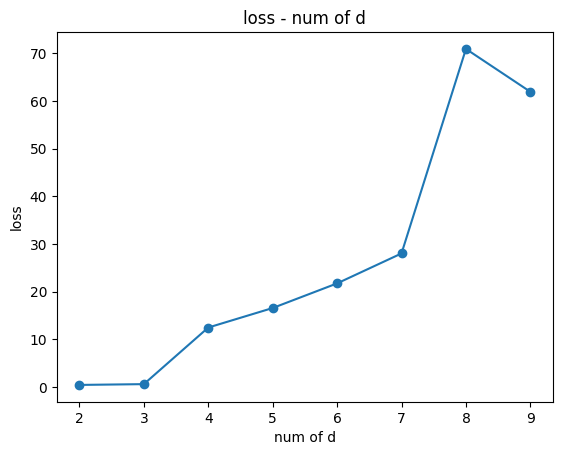

In [59]:
# plot your amount of loss and number of d in datasets
# TODO
plt.plot([n for n in range(2, 10)], losses, marker='o')
plt.title("loss - num of d")
plt.xlabel('num of d')
plt.ylabel('loss')
plt.show()

# Write your opinion

+ You can see, as the number of d in the sequences increases the amount of the total loss increases too. Why?
    - `your answer`

+ Can you mathematically explain your opinion? (help: There are some gradient issues!)
    - `your answer`

+ Can you explain the problem of Long-term dependencies in RNNs?
    - `your answer`

# Gated Recurrent Units (GRUs) (30 points)

Step3. In the previous section, you saw, simple recurrent models cannot remember information from the past. This is a big problem because in real-world applications sequences have a lot of dependencies on their past time steps and we have to find a way to remember the information from the past. To address this problem, researchers have designed other architecture that can selectively remember or forget information over time. Like: `Long-Short Term Memory (LSTM)` and `Gated Recurrent Unit (GRU)`. The key building block behind these architectures is `gate`.

#### GATE:
These networks, use gates to track information throughout many time steps:
+ Add information, when the information is needed.
+ Remover information, When information is not important

<img src="GATE.jpg" width="400" height="200">

#### Long-Short Term Memory:
LSTM is an improved version of RNNs. In a classical recurrent model, there is a single hidden state `h` which is used to help the model to remember some information over time. But this is not enough to learn long-term dependencies. Using gates, LSTM is capable of addressing the problem of long-term dependencies. 

LSTM cell:

<img src="LSTM.jpg" width="400" height="200">

GATES:
+ <font color=green size=3> Forget gate:</font> To forget irrelevant information.
+ <font color=red size=3> Store gate:</font> Decide what part of new is relevant.
+ <font color=orange size=3> Update:</font> update cell state values.
+ <font color=blue size=3> Output gate:</font> Controls what information is sent to the next time step.
 
This architecture addresses the gradient issues you have described in the previous section. (How?)

`write your answer`

#### Gated Recurrent Unit (GRU):
Like LSTM, GRU is designed to model sequential data by allowing information to be selectively remembered or forgotten over time.

GRU cell:

<img src="GRU.jpg" width="400" height="200">

GATES and other parts:
+ <font color=green size=3> Reset gate:</font> How much of previous hidden state to forget.
    - $r_t = \sigma(W_r \cdot [h_{t-1}, x_t])$
+ <font color=orange size=3> Update gate:</font> How much of the candidate activation vector to incorporate into the new hidden state.
    - $z_t = \sigma(W_z \cdot [h_{t-1}, x_t])$
    
+ <font color=red size=3> Candidate Activation vector:</font> Computed using the current input x and modified version of the previous hidden state that is `reset` by the reset gate.
    - $\tilde{h}_t = \tanh(W_h \cdot [r_t \odot h_{t-1}, x_t])$

+ <font color=blue size=3> Hidden state</font>
    - $h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t$

Note: the $W_r$, $W_z$, $W_h$ are the weights associated with the GRU cell.

# GRU Implementation
Now, implement a Gated Recurrent Unit from scratch.

In [ ]:
class GRU_cell(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_calsses):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_classes = num_calsses

        self.reste_gate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)
        self.update_gate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)
        self.candidate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)
        
        self.output = nn.Linear(self.hidden_dim, self.num_classes)
        
        # TODO
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        
    def forward(self, x, h, end = False):
        # TODO
        if not end:
            # reset gate
            vec = torch.cat([x, h], dim = 1)
            r = self.sigmoid(self.reste_gate(vec))
            
            # update gate
            z = self.sigmoid(self.update_gate(vec))

            # candidate
            vec1 = torch.cat([x, torch.mul(r, h)], dim = 1)
            h_tilde = self.tanh(self.candidate(vec1)) 

            # hidden state
            h = torch.mul(z, h) + torch.mul((1 - z), h_tilde)
            return h
        
        else:
            return self.output(h)

# MNIST 
MNIST database is a collection of handwritten digits. You are going to use this database to train and test your GRU cell.

First, to download this database run the cell below.

In [ ]:
database = MNIST(root = 'data/', download = True)
# TODO
train_data = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
test_data = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

Show the image and label of one instance from the train data.

4


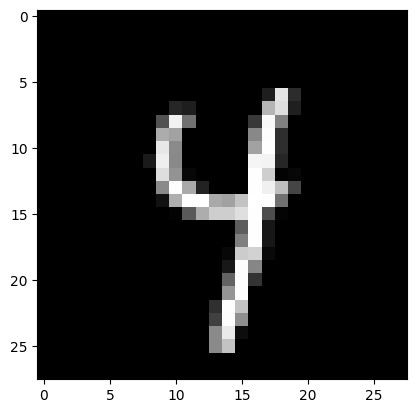

In [179]:
# TODO
image, label = database[26]
plt.imshow(image, cmap = 'gray')
print(label)

In [136]:
# TODO
print(train_data[70])
print(train_data[70][0].shape)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2510, 0.7490, 0.2745,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

### Write a generate custom dataset function
+ For each data in the database convert, use one-hot encoding from pytorch to encode your label to a vector. This is necessary for computing the amount of loss.
+ It is common to use batches of data to train our model simultaneously on a batch. The length of a batch at most is `BATCH_SIZE`.
    - Note: you can also train your model on each data (one by one) but the training part will take too much time. 
+ Return batches of data.

In [150]:
HIDDEN_DIM = 15
INPUT_DIM = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 30

In [ ]:
def CustomeDataset(data, batch_size = BATCH_SIZE):
    """ 
        Generate batches of data. Use one-hot encoding to encode your labels according to number of classes.
        
        Parameters:
            - data: MNIST database
            - batch_size = BATCH_SIZE

        Returns:
            - batches = A list of [(image_tensor, encoded label)]. Each batch's length is at most BATCH_SIZE
    """
    batches = []
    
    # TODO
    x = None
    y = None
    for image_tensor, label in data:
        encoded_label = F.one_hot(torch.tensor(label), num_classes = NUM_CLASSES)
        encoded_label = torch.tensor(encoded_label, dtype=torch.float32).unsqueeze(dim = 0)
        if x is None:
            x = image_tensor
            y = encoded_label
        elif len(x) < batch_size:
            x = torch.concat((x, image_tensor), dim = 0)
            y = torch.concat((y, encoded_label), dim = 0)
        else:
            batches.append((x, y))
            x = None
            y = None
    batches.append((x, y))
    return batches

### Training loop
write your training loop.
+ For loss function: use `CrossEntropyLoss` function
+ Use adam optimizer
+ To optimize your training process, you can use `optim.lr_schduler`. (Why this will improve the training process?)
    - `your answer`
+ Note: Also, in each time step give one row of image tensor to the model because your model is sequential (you also can use each column).

In [152]:
# TODO
# create batches
batches = CustomeDataset(train_data)

# Initialize model, loss function, and optimizer
model = GRU_cell(INPUT_DIM, HIDDEN_DIM, NUM_CLASSES)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# use scheduler to set learning rate
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

# training loop
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for x, y in batches:
        optimizer.zero_grad()
        h = torch.zeros(len(y), HIDDEN_DIM)
        for i in range(INPUT_DIM):
            h = model(x[:, i, :], h)
            
        pred = model(None, h, end = True)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    scheduler.step(total_loss/len(batches))
    print(f'Epoch {epoch+1}, Loss: {total_loss/len(batches)}')

/var/folders/09/231t9s654db24dw3fmq2bn4w0000gn/T/ipykernel_1458/1925120214.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encoded_label = torch.tensor(encoded_label, dtype=torch.float32).unsqueeze(dim = 0)


Epoch 1, Loss: 1.696690767491836
Epoch 2, Loss: 0.9307167171920318
Epoch 3, Loss: 0.7645647101775771
Epoch 4, Loss: 0.6570005429660813
Epoch 5, Loss: 0.5690371615436456
Epoch 6, Loss: 0.49447377317069424
Epoch 7, Loss: 0.4300700551130741
Epoch 8, Loss: 0.3748037531780071
Epoch 9, Loss: 0.33478220478659537
Epoch 10, Loss: 0.3048188648958063
Epoch 11, Loss: 0.2804979829701231
Epoch 12, Loss: 0.2600483837349604
Epoch 13, Loss: 0.24269117399762372
Epoch 14, Loss: 0.22800932041181515
Epoch 15, Loss: 0.21541096133383814
Epoch 16, Loss: 0.2040974917250002
Epoch 17, Loss: 0.19430463522864513
Epoch 18, Loss: 0.18527836562034397
Epoch 19, Loss: 0.1773249728509221
Epoch 20, Loss: 0.16986259106994314
Epoch 21, Loss: 0.16304046559135546
Epoch 22, Loss: 0.1566499202620126
Epoch 23, Loss: 0.15074346987370704
Epoch 24, Loss: 0.1454188975249717
Epoch 25, Loss: 0.1405162517832744
Epoch 26, Loss: 0.13606172271248737
Epoch 27, Loss: 0.1320154333742967
Epoch 28, Loss: 0.1283142595080251
Epoch 29, Loss: 0.1

### Test your model on Test data
Use the test data to evaluate your model.
+ Print the accuracy of your model (should be greater than $94\%$).
+ Show some predictions with actual value from the test data.

In [163]:
model.eval()
with torch.no_grad():
    # compute the accuracy of your model
    # TODO
    count = 0
    dataset = CustomeDataset(test_data)

    for x, y in dataset:
        h = torch.zeros(len(y), HIDDEN_DIM)
        
        for i in range(INPUT_DIM):
            h = model(x[:, i, :], h)

        output = model(None, h, end = True)
        pred = torch.argmax(output, dim = 1)
        actual = torch.argmax(y, dim = 1)
        count += torch.sum(pred == actual)
        
    print((count / len(test_data)) * 100)

/var/folders/09/231t9s654db24dw3fmq2bn4w0000gn/T/ipykernel_1458/1925120214.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encoded_label = torch.tensor(encoded_label, dtype=torch.float32).unsqueeze(dim = 0)


tensor(9526)
10000
tensor(95.2600)


In [ ]:
# show images of 50 predictions with actual values 